![0](./dimension_reduction_methods.png)

<img src = './dimension_reduction_methods_2.png' width = "500px"></img>

# Ch 5. 차원 축소

## 0. 용어 정의

- Manifold (다양체) : 고차원 공간 중, 저차원으로 표시 가능한 도형
- Data Point : 고차원 데이터 포인트

 $$ x_i \in \mathbf{R}^D $$

- Map Point : 저차원 데이터 포인트

 $$ y_i \in \mathbf{R}^2\; or\; \mathbf{R}^3 $$
 
- Mapping : 고차원 데이터 포인트를 저차원 데이터 포인트로 대응시킴

  $$ x_i \rightarrow y_i $$

## 1. 주성분분석 (PCA)

### 1) 정의

 - 고차원 벡터를 저차원 벡터공간으로 사영할 때, 분산 구조를 최대한 잘 설명할 수 있는 축을 찾는다.
 
 $$ x_i =  \begin{pmatrix} x_{i1}, x_{i2}, \ldots, x_{ip} \end{pmatrix}$$
 
 $$ x_i =  (x_{i1}, x_{i2}, \ldots, x_{ip}) $$
 
 $$ 1 \leq i \leq n $$

### 2) 실행 과정

① 데이터 전처리 : 표준화 or 정규화  
② 공분산행렬 계산  
③ 고윳값, 고유벡터 계산  
④ 주성분 선택  
⑤ 데이터 변환  

## 2. 선형 판별분석 (LDA)

### 1) 정의
- 데이터를 특정 선에 사영(Projection)하여 데이터를 잘 분류하는 선형 결정경계(Decision Boundary)를 찾아내는 것이 목표
- 데이터가 특정 클러스터에 속할 확률을 최대화하는 방향으로 변환 (Bayes' Rule)

$$ P(A_i|A) = \frac{P(A_i)P(A|A_i)}{P(A)} = \frac{P(A_i)P(A|A_i)}{\sum^n_{k = 1}{P(A_k)P(A|A_k)}}$$

$$ Discriminant \; Func. : \; P(Y = k|X = x) = \frac{\pi_k f_k(x)}{\sum^k_{l = 1}{\pi_i f_l(x)}} $$

$$ f_k(x) = \frac{1}{\sqrt{2\pi\sigma_k}} exp(-\frac{1}{2\sigma^2_k}(x - \mu_k)^2) $$

$$ \pi_{k} \; : \; Prior \; Probability $$
$$ P(Y = k|X = x) \; : \; Posterior \; Probability $$
$$ f_k(x) \; : \; Likelihood $$

- 클러스터 간 평균이 멀도록, 클러스터 내 분산이 작도록 하는 벡터를 찾는다.  
  ① 클래스 간 분산(Between-Class Scatter)이 최대가 되게 하는 벡터  
  ② 클래스 내 분산(Within-Class Scatter)이 최소가 되게 하는 벡터  
- 차원축소, 분류(Classification)에 사용 : 다른 분류 알고리즘 사용 전 차원축소 목적으로 사용하면 좋음

### 2) Assumption
- 각 클래스들은 Normal Distribution의 확률분포를 가짐
- 각 클래스들은 유사한 형태의 공분산 구조를 가짐 ($ \rightarrow $ 공통의 공분산 행렬 사용)

### 3) 실행 과정
  ① 데이터 스케일링 (Standardization, 표준화 전처리)  
  ② 각 클래스에 대하여 $d$차원의 평균 벡터 계산  
  
$$ \mu_i = \frac{1}{N_i} \sum_{x_j \in C_i} x_j $$ 

$$ C_i : i번째 \; Class \; (i \leq M)$$
$$ N_i : i번째 \; Class \; 내 \; 데이터 \; 크기 $$

  ③ 클래스 간 분산 행렬 $S_{B}$와 클래스 내 분산 행렬 $S_{W}$ 계산 (각 클래스가 독립임을 가정함.)
  
$$ S_B = \sum^M_{i = 1}N_i (\mu_i - \mu)(\mu_i - \mu)^T  $$

$$ S_W = \sum^M_{i = 1}{S_i} = \sum^M_{i = 1}\sum_{x_j \in C_i} (x_j - \mu_i)(x_j - \mu_i)^T $$

$$ \mu : 전체 \; Class \; 평균 $$

  ④ 고윳값 및 고유벡터 계산  
  
$$ Objective \; Func. :\; J(v) = \frac{v^T S_B v}{v^T S_W v} $$

$$ v = argmax \; {J(v)} = \underset{v \in R^d}{argmax} \frac{v^T S_B v}{v^T S_W v} $$

Lagrange Multiplier Method 사용하여 전개.

$$ Maximize \; J(v) = {v^T S_B v} \; s.t. \; {v^T S_W v = 1} $$

$$ \rightarrow L(v, \lambda) = {v^T S_B v} - {\lambda(v^T S_W v - 1)} $$

$$ \therefore S_{W}^{-1}S_{B}v = \lambda v $$
     
  ⑤ 고윳값 크기 순으로 고유벡터 추출  
  ⑥ 차원 축소 완료
  
### 4) 특징
- Feature 간 공분산 구조를 잘 반영함
- Binary feature라도 적용 가능함
- 가정에서 크게 벗어나지만 않는다면 사용 가능
- 최소 클래스의 크기가 Feature 수보다 많아야 함

### 5) PCA와의 비교
<img src = './pca_lda_diff_1.png' width = "400px"></img>

<table>
    <thead>
        <th height = "40"> <center> PCA </center> </th> 
        <th height = "40"> <center> LDA </center> </th> 
    </thead>
    <tr >
        <td colspan = "2"> <center> Eigenvalue를 사용한 차원축소 </center> </td> 
    </tr>
    <tr >
        <td> <center> 비지도학습 </center> </td> 
        <td> <center> 지도학습 </center> </td> 
    </tr>
    <tr >
        <td> <center> 분산 최대화 </center> </td> 
        <td> <center> 사후확률 최대화 </center> </td> 
    </tr>
    <tr >
        <td> <center> 클래스 간 분산 차이 > 평균 차이 </center> </td> 
        <td> <center> 클래스 간 평균 차이 > 분산 차이 </center> </td> 
    </tr>
</table>

### 6) Variations
- Kernel LDA (KLDA)
- Quadratic Discrimination Analysis (QDA)

## 3. 다차원척도법 (MDS)

### 1) 정의
- 다차원의 데이터포인트 간의 유사성(비유사성)을 저차원에 기하학적으로 Mapping하여 관계(근접성, Proximity)를 시각적으로 표현하는 분석 기법
- 각 데이터 포인트 간의 유사도(Similarity)를 측정하여 거리행렬을 만들어 진행
- Data Reduction, Dimension Reduction
- Unsupervised Learning

### 2) 특징
- 모든 점 간의 거리 정보를 보존
- MDS로 시각화 시, 데이터 유사도를 확인할 수 있음.
- 모든 점들 간의 거리 정보 중요도를 동일하게 평가하여, 거리 정보가 크게 중요하지 않은 고차원에서의 데이터 구조를 잘 보존하지 못함. (고차원 공간의 시각화에 적절한 방법은 아님)
- Metric Space(거리 정의 가능)를 가정

### 3) 실행 과정
  ① 비유사성(거리) 계산 : 유클리드 거리행렬 등  
  ② Stress Value : 상대적 거리의 정확도를 제고하기 위한 다차원 공간에서의 조정작업. 실제 거리와의 오차를 나타내며, 고차원일수록 값이 낮아짐. (0 $\leq S \leq 1$)  
  
  $$ minimize \sum_{i < j}(|{y_i - y_j}| - \delta_{ij})^2 $$ 
  
  ③ 부적합도가 특정 수준 이하에 도달할 때까지 부적합도를 최소화하는 반복 알고리즘 사용  (Stress Value $S$가 낮을수록 좋음)

### 4) PCA와의 차이점

![1](./pca_mds_diff_1_table.PNG)

![2_pca](./pca_mds_diff_2_pca.PNG)|![2_mds](./pca_mds_diff_2_mds.PNG)
--- | --- | 
  
### 5) 계량적 MDS
- 데이터가 구간척도, 비율척도(연속형 변수)인 경우에 사용함.
- Similarity Matrix $S$ 사용
- 최소 거리 MDS

$$ Disparity = \hat{d}_{ij} = bS_{ij} $$

$$ Stress = \sum_{i < j} d_{ij}(X) - \hat{d_{ij}}(X) $$


### 6) 비계량적 MDS
- 데이터가 순서척도인 경우에 사용함. Respects only Rankings of Distances.
- 거리의 Rank만을 사용하기 때문에, 데이터 간의 거리를 동일하게 취급함. 유사성 대신 비유사성 (Dissimilarity) 사용
- 원데이터의 데이터포인트 거리가 서로 다른 경우, 임베딩 시 왜곡이 생기기 때문에 Stress Value를 아래와 같이 정규화하여 사용함. (Stress-1)
- 최대 유사성 MDS, 비선형 MDS

  $$ \delta_{ij} = c_1 - c_2 S _{ij} $$

  $$ Stress_1 = \sqrt{\frac{\sum_{i < j}(d_{ij} - \hat{d_{ij}})^2}{\sum_{i < j}{d_{ij}}^2}} $$

## 4. ISOMAP
- MDS와 Kernel PCA의 확장, 결합
- 모든 점 사이의 측지선(Geodesic) 거리를 유지하는 저차원 임베딩 추구
- 거리 측정 시, KNN 사용 가능 (특정값 $\epsilon$ 기준으로 연결하기도 함)
- 각 점들의 최단 거리 계산 시, Dijkstra 알고리즘이나 Floyd-Warshall 알고리즘 사용
- LandMark ISOMAP (L-ISOMAP)
- C-ISOMAP
- Parallel Transport Unfolding

## 5. Locally Linear Embedding (LLE)

### 1) 특징
- 전체적으로는 비선형 공간이지만, 국소적으로는 선형인 공간 전제
- 고차원 공간에서 인접한 점들의 선형적 구조를 보존하면서 저차원으로 임베딩 ("국소적 선형 적합")
- ISOMAP과 유사하나, Locality 반영 방식에 차이가 있음
- 데이터 점들 간의 거리 데이터 추정 필요 없음

### 2) Variations
- Standard LLE
- Modified LLE : Standard LLE의 Local Optimization 문제 보완
- Hessian-based LLE (HLLE, Hessian Eigenmapping)

## 6. Local Tangent Space Alignment (LTSA)
- LLE와 동작 방식이 유사하여, LLE의 일종으로 보기도 함.
- 고차원 데이터의 기하학적 구조 정보를 보존하기 위하여 각 데이터포인트들에 대한  접선 공간(Tangent Space)을 저차원 공간에 임베딩

## 7. Spectral Embedding
- Laplacian Eigenmapping  
 ① Weighted Graph Construction : Adjacency Matrix Representation  
 ② Construct (Un)Nomalized Graph Laplacian  
 ③ Partial Eigenvalue Decomposition  
 
 $$ Unnormalized\; Laplacian : L = D - A $$
 $$ Normalized\; Laplacian : L = D^{-\frac{1}{2}}(D-A)D^{-\frac{1}{2}} $$
 
 $$ D : Degree\; Matrix $$
 $$ A : Adjacency\; Matrix $$ 

## 8. Stochastic Neighbor Embedding (SNE)

### 1) SNE
- 고차원 공간의 데이터포인트들의 유클리드 거리를 유사성 기반의 조건부 확률로 표현
- 거리 정보보다는 클러스터링 구조 정보를 보존하는 경향이 있음
- 각 공간에서의 데이터 포인트 $ x_i $와 $ x_j\; (i \neq j) $의 유사도를 나타내는 조건부 확률은 $ x_i $에서 $x_j$가 선택될 확률을 Gaussian 분포로 표현  
  $ \rightarrow $ 조건부 확률이 높으면 유사도가 높아 거리가 가깝다고 볼 수 있음.
- 평가 지표 : Kullback-Leibler Divergence (KL Divergence)

 $$ D_{KL}(P \Vert Q) : \sum_{x \in X}{P(x)\,\log_{b}\left(\frac{P(x)}{Q(x)}\right)} $$
 
 $$ C \;=  \sum_{i}{D_{KL}(P_{i} \Vert Q_{i})} = \sum_{i, j}{p_{j|i} \log\left({\frac{p_{j|i}}{q_{j|i}}}\right)}$$

  고차원 공간에서의 분포 $P$와 저차원 공간에서의 분포 $Q$에서의 조건부 확률의 차이를 KL Divergence를 통해 비교하고, Cost $C$가 최소화될 때까지 $Q$를 업데이트한다. (Gradient Descent)

### 2) t-SNE
- Student's T 분포 사용 (자유도 1) : SNE의 Crowding Problem 보완  
  ($P$는 Gaussian 분포 그대로, $Q$만 t분포로 변경됨)
- Gaussian 분포는 양 끝 꼬리가 얇아, 거리에 따른 확률 차이가 비례하지 않다는 문제가 존재함. Heavy-tailed Distribution 사용이 필요함.
- 고차원 공간에서 전제하는 Gaussian 분포에 수렴할 수 있는 Heavy-tailed Distribution은 Student's T 분포임.

### 3) Symmetric SNE

### 4) Barnes-Hut t-SNE
- 기존 t-SNE의 연산 비용 (시간 복잡도 $ O(n^2) $) 문제 완화
- 현재 scikit-learn에서의 t-SNE는 이 방식을 사용하고 있음

### 5) 특징
- 클러스터링 정보를 잘 보존함. PCA와 달리 클러스터 중복 문제가 없음.  
 $ \rightarrow $ 고차원 데이터 시각화에 효과적임.
- 비교적 정확하고 안정적인 임베딩 결과가 필요할 때 효과적임.
- 매번 initial point가 변경되어 학습용으로 사용하기 어려움.
- input feature를 확인하기 어려워, 결과 해석이 어려움.
- Computational Cost가 높음.

## 9. Auto Encoder

##### 참고 자료
https://velog.io/@swan9405/MDS-Multidimensional-Scaling  
https://wikidocs.net/201522  
https://velog.io/@euisuk-chung/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C-%EB%B3%80%EC%88%98-%EC%B6%94%EC%B6%9C%EB%B2%95-Multi-Dimensional-Scaling-MDS  
https://woosikyang.github.io/first-post.html  
https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py  
https://roytravel.tistory.com/105  
https://nate9389.tistory.com/1730#google_vignette  
https://bskyvision.com/entry/%EA%B2%B0%EA%B5%AD-%EA%B3%A0%EC%9C%A0%EA%B0%92-%EB%AC%B8%EC%A0%9C%EB%A1%9C-%EC%88%98%EB%A0%B4%EB%90%98%EB%8A%94-%EC%84%A0%ED%98%95%ED%8C%90%EB%B3%84%EB%B6%84%EC%84%9DLDA  

In [138]:
from sklearn.datasets import load_iris

x = load_iris().data
y = load_iris().target
target_names = load_iris().target_names

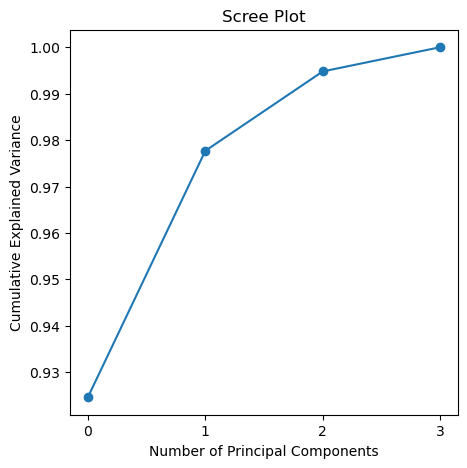

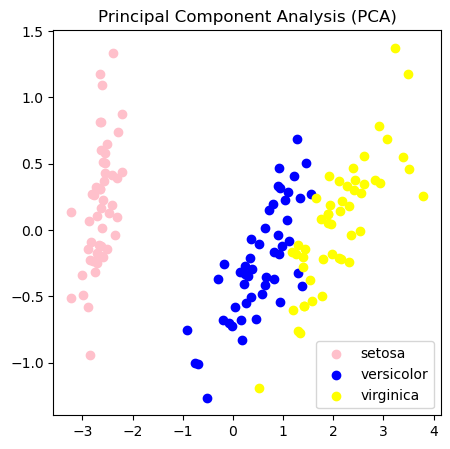

In [139]:
# 1. Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components = x.shape[1])
x_pca = pca.fit(x)

## Scree Plot
scree_plot = plt.figure(figsize = (5, 5))

plt.title('Scree Plot')
plt.plot(np.cumsum(x_pca.explained_variance_ratio_), marker = 'o')
plt.xticks(np.arange(0, x.shape[1], step = 1))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

# Reset the number of principal component (n_components)
pca_new = PCA(n_components = 2)
x_pca = pca_new.fit_transform(x)

pca_result = plt.figure(figsize = (5, 5))

my_color = ['pink', 'blue', 'yellow']
plt.title('Principal Component Analysis (PCA)')

for c, i, species in zip(my_color, [0, 1, 2], target_names) :
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color = c, label = species)

plt.legend()
plt.show()

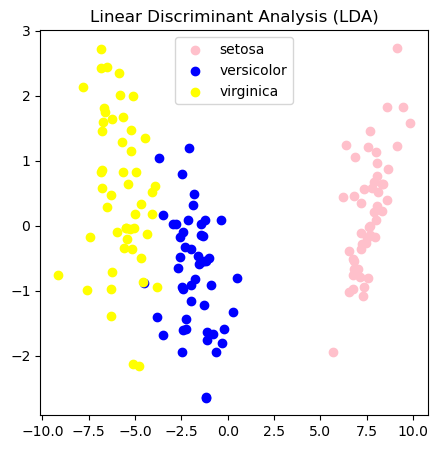

In [140]:
# 2. Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
x_lda = lda.fit(x, y).transform(x)

lda_result = plt.figure(figsize = (5, 5))

my_color = ['pink', 'blue', 'yellow']
plt.title('Linear Discriminant Analysis (LDA)')

for c, i, species in zip(my_color, [0, 1, 2], target_names) :
    plt.scatter(x_lda[y == i, 0], x_lda[y == i, 1], color = c, label = species)

plt.legend()
plt.show()

In [141]:
from sklearn.datasets import make_swiss_roll

x, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 123)

In [33]:
# 3. Multi-Demensional Scaling (MDS)
from sklearn.manifold import MDS

mds = MDS(n_components = 2, random_state = 123)
x_reduced_mds = mds.fit_transform(x)

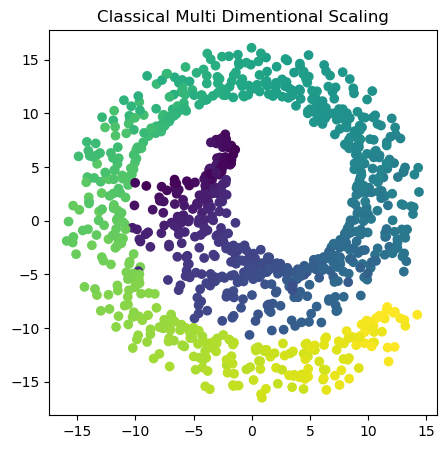

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig1 = plt.figure(figsize = (5, 5))

plt.title('Classical Multi Dimentional Scaling')
plt.scatter(x_reduced_mds[:, 0], x_reduced_mds[:, 1], c = t, cmap = 'viridis')
plt.show()

In [28]:
# 4. ISOMAP (Kruskal)
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors = 5, n_components = 2)
x_reduced_iso = iso.fit_transform(x)

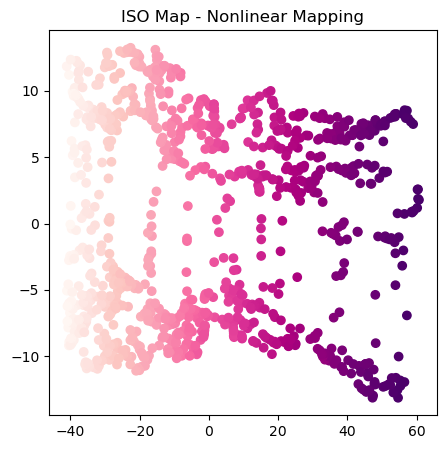

In [29]:
fig2 = plt.figure(figsize = (5, 5))

plt.title('ISO Map - Nonlinear Mapping')
plt.scatter(x_reduced_iso[:, 0], x_reduced_iso[:, 1], c = t, cmap = 'RdPu')
plt.show()

In [146]:
# 5. Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 15)
x_reduced_lle = lle.fit_transform(x)

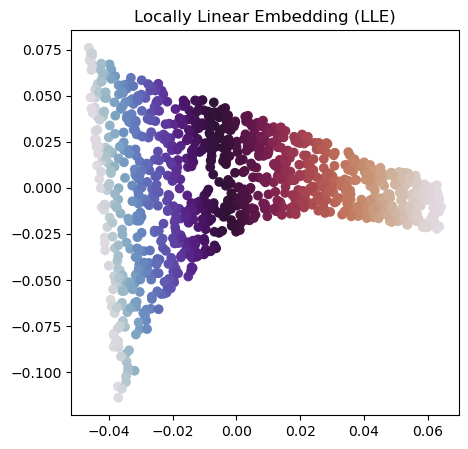

In [147]:
fig3 = plt.figure(figsize = (5, 5))

plt.title('Locally Linear Embedding (LLE)')
plt.scatter(x_reduced_lle[:, 0], x_reduced_lle[:, 1], c = t, cmap = 'twilight')
plt.show()

In [149]:
# 6. Local Tangent Space Alignment (LTSA)
from sklearn.manifold import LocallyLinearEmbedding

ltsa = LocallyLinearEmbedding(n_components = 2, n_neighbors = 15, method = 'ltsa')
x_reduced_ltsa = ltsa.fit_transform(x)

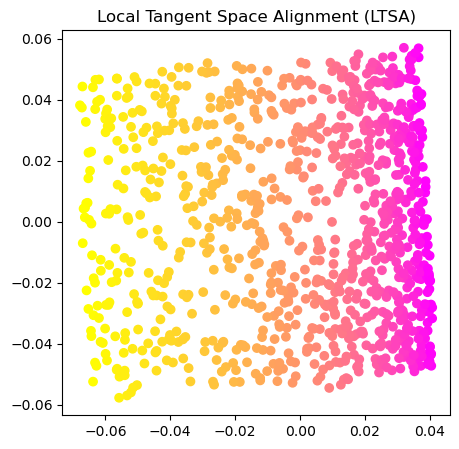

In [150]:
fig4 = plt.figure(figsize = (5, 5))

plt.title('Local Tangent Space Alignment (LTSA)')
plt.scatter(x_reduced_ltsa[:, 0], x_reduced_ltsa[:, 1], c = t, cmap = 'spring')
plt.show()

In [153]:
# 7. Spectral Embedding
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components = 2)
x_reduced_se = se.fit_transform(x)

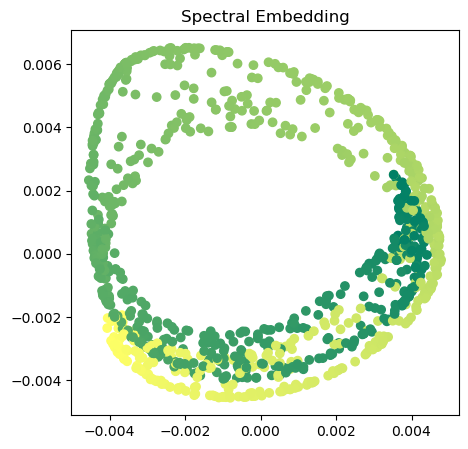

In [154]:
fig5 = plt.figure(figsize = (5, 5))

plt.title('Spectral Embedding')
plt.scatter(x_reduced_se[:, 0], x_reduced_se[:, 1], c = t, cmap = 'summer')
plt.show()

In [155]:
from sklearn.datasets import load_iris

x = load_iris().data
y = load_iris().target
target_names = load_iris().target_names

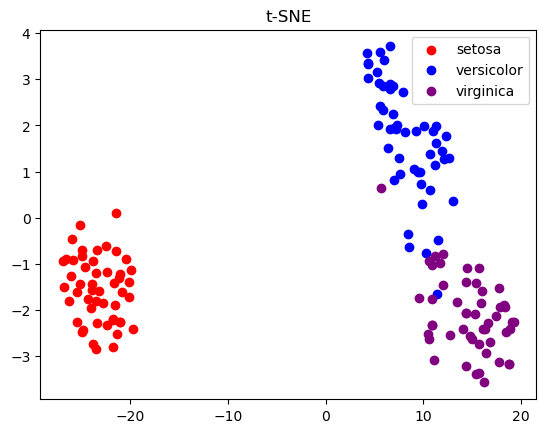

In [160]:
# 8. Stochastic Neighbor Embedding (SNE)

## (1) SNE
## (2) t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
x_reduced_tsne = tsne.fit_transform(x)

df_reduced_tsne = pd.concat([pd.DataFrame(x_reduced_tsne), pd.Series(y)], axis = 1)
df_reduced_tsne.columns = ['C1', 'C2', 'Class']

my_color = ['red', 'blue', 'purple']
plt.title('t-SNE')

for c, i, species in zip(my_color, [0, 1, 2], target_names) :
    plt.scatter(df_reduced_tsne[df_reduced_tsne['Class'] == i].iloc[:, 0], df_reduced_tsne[df_reduced_tsne['Class'] == i].iloc[:, 1]
                , color = c, label = species)

plt.legend()
plt.show()

## [참고] 행렬 인수분해

## 1. SVD (Singular Value Decomposition)
- PCA, LDA와 같이 고유벡터, 고윳값을 분해하는 방법임.
- PCA와 LDA는 정방행렬만 분해 가능하다면, SVD는 직사각행렬도 분해 가능함.

$$ A_{m \times n} = U_{m \times m} \Sigma_{m \times n} V^T_{n \times n} $$

 - "행렬의 곱"은 "선형변환"이다!
 - 직교하는 두 벡터가 있을 때, 선형변환 후에도 여전히 직교할까?
 - U, V는 직교하는 벡터의 모음 (행렬)이자 특이벡터임 orthogonal matrix
 - Sigma는 변화의 크기, 대각행렬
 
 - 정방행렬의 특이값과 특이벡터를 계산. 특이값은 정방행렬의 분산을 나타내며 특이벡터는 정방행렬의 축을 나타냄
 - 정방행렬의 선형변환을 이해하는 데에도 사용됨
 - 선형변환 : 벡터를 행렬의 곱으로 표현. 벡터의 방향과 크기를 변경한다
 
 - Full SVD, Compact SVD, Truncated SVD

## 2. NMF (Non-negative Matrix Factorization)

### 1) 정의
 - 모든 원소값이 양수인 행렬 $V$는 2개의 기반 양수 행렬 $W$와 $H$로 분해할 수 있다.
 
 $$ V_{m \times n} \approx W_{m \times p} \times H_{p \times n} $$
 
 - 가중치행렬 $W$ : $V$의 행에 대한 각 특성의 적합도 (Latent Representation)
 - 특성행렬 $H$ : 각 특성에 대한 $V$의 열의 중요도 (Latent Feature)
 - $ p $ : 잠재요소의 수
 
### 2) 실행 과정

 ① 가중치행렬 $W$와 특성행렬 $H$의 Initial Value 무작위 설정  
 ② $ W \times H $가 원본행렬 $V$에 근사할 때까지 반복 (Multiplicative Update Rule 등)
 
 $$ WN = V \times W^T $$
 $$ WD = H \times W \times W^T $$
 $$ HN = H^T \times V $$
 $$ HD = H^T \times H \times W $$ 

### 3) 특징
 - 분해 시 결과는 원본행렬 $V$와 같지 않다.  
 - 원본행렬과의 유사성을 높이고 싶다면 잠재 Feature의 수인 $p$를 높이면 되지만, Overfitting과 Computational Cost의 문제가 있을 수 있다. 
 - 주성분이 아닌 "주제별"로 분해 → "평균" 차이에 더 중점을 둔다. 

## 3. EigenValue Decomposition

$$ A = V \Lambda V^{-1} \;\; (Diagonalization) $$


- 대칭행렬의 고윳값 분해 (Spectrum Decomposition)

$$ S = V \Lambda V^{-1} =  V \Lambda V^T $$

## 4. QR Decomposition
$$ A = Q \times R $$ 

## 5.  Polar Decomposition

$$ A = R \times W $$

## 6.  LU Decomposition

$$ A = L \times U $$

In [41]:
# 1. SVD (Singular Value Decomposition)
from numpy.linalg import svd

from sklearn.decomposition import TruncatedSVD

data = np.random.randn(5, 5)  # 랜덤한 행렬 생성 (정규분포)
U, sigma, v_t = svd(data)

print(f"행렬 U의 크기 : {U.shape}")
print(f"행렬 Sigma의 크기 : {sigma.shape}")
print(f"행렬 V_t의 크기 : {v_t.shape}")

행렬 U의 크기 : (5, 5)
행렬 Sigma의 크기 : (5,)
행렬 V_t의 크기 : (5, 5)


In [87]:
# 2. NMF (Non-negative Matrix Factorization)
from sklearn.decomposition import NMF

data = np.random.rand(4, 6)

nmf = NMF(n_components = 2)  # 랜덤한 행렬 생성 (균등분포)
nmf.fit(data)
data_nmf = nmf.transform(data)

print(f"원본행렬 : {data.shape}")
print(f"가중치행렬 W : {data_nmf.shape}")
print(f"특성행렬 H : {nmf.components_.shape}")

원본행렬 : (4, 6)
가중치행렬 W : (4, 2)
특성행렬 H : (2, 6)


In [99]:
# 3. Eigendecomposition of Symmetric Matrix
from np.linalg import eig

data = np.random.rand(3, 3)
eigval, eigvec = eig(data)

eigval_1, eigval_2, eigval_3 = eigval
eigvec_1, eigvec_2, eigvec_3 = eigvec[:, : 1], eigvec[:, 1 : 2], eigvec[:, 2 : ]

In [105]:
# 4. QR Decomposition
from numpy.linalg import qr

data = np.random.rand(3, 3)

q, r = qr(data)

In [110]:
# 5. Polar Decomposition
from scipy.linalg import polar

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

r, w = polar(data)

##### 참고 자료
https://blog.naver.com/PostView.naver?blogId=paragonyun&logNo=222465847517  
https://jhryu1208.github.io/data/2020/12/10/ML_NMF/